# Notebook for experiments on modelling the second IML project data

## 1. Dependency management
Install the provided environment.yml file in the root directory of the repository. 
If this fails, run the commands below in a terminal window. This may lead to clashes with other packages!

In [67]:
# !conda install -c conda-forge jupyterlab -y
# !conda install -c conda-forge imbalanced-learn -y
# !conda install -c conda-forge pandas-profiling -y

## 2. Data Visualization & Analysis 

In [68]:
import pandas_profiling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from ipywidgets import widgets
from pandas_profiling import ProfileReport

%matplotlib inline

In [69]:
# Load data
df_train = pd.read_csv("data/train_features.csv")
df_train_label = pd.read_csv("data/train_labels.csv")
df_test = pd.read_csv("data/test_features.csv")

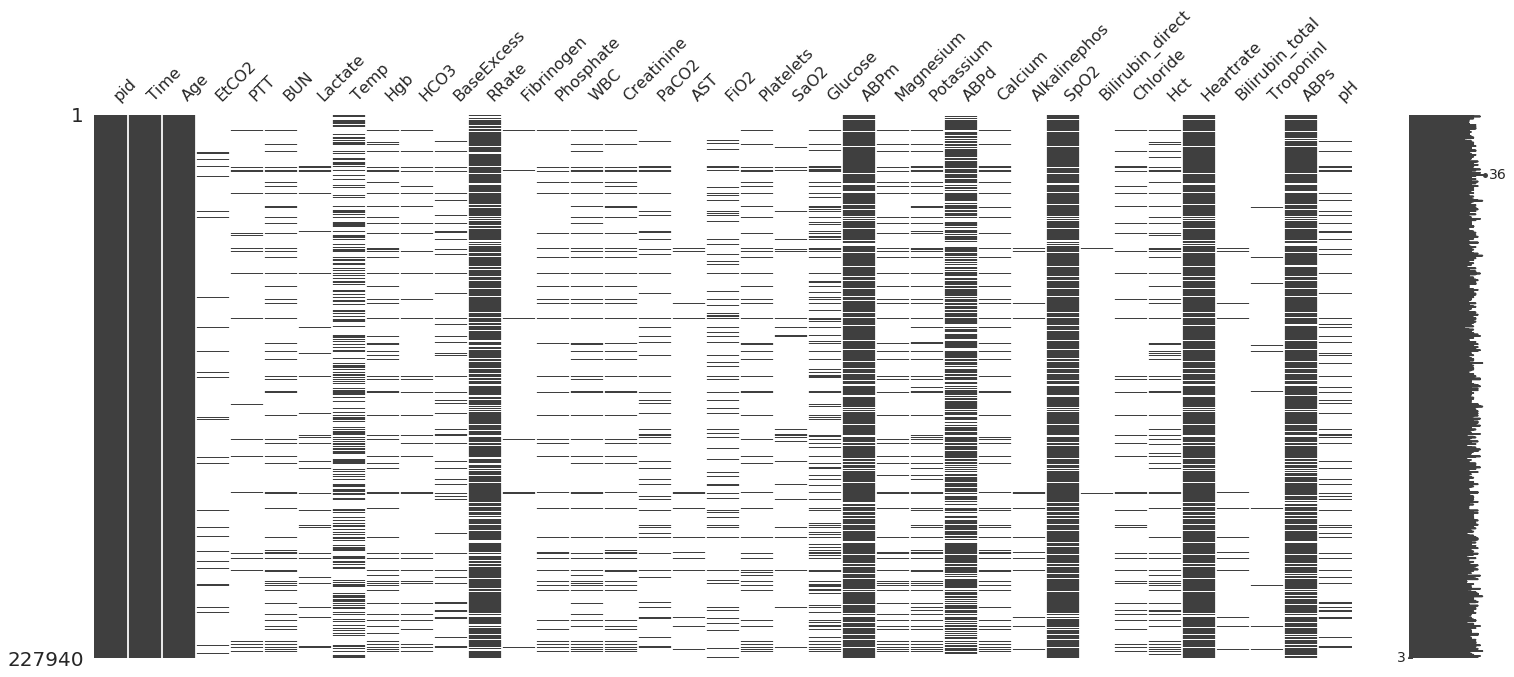

In [70]:
msno.matrix(df_train)

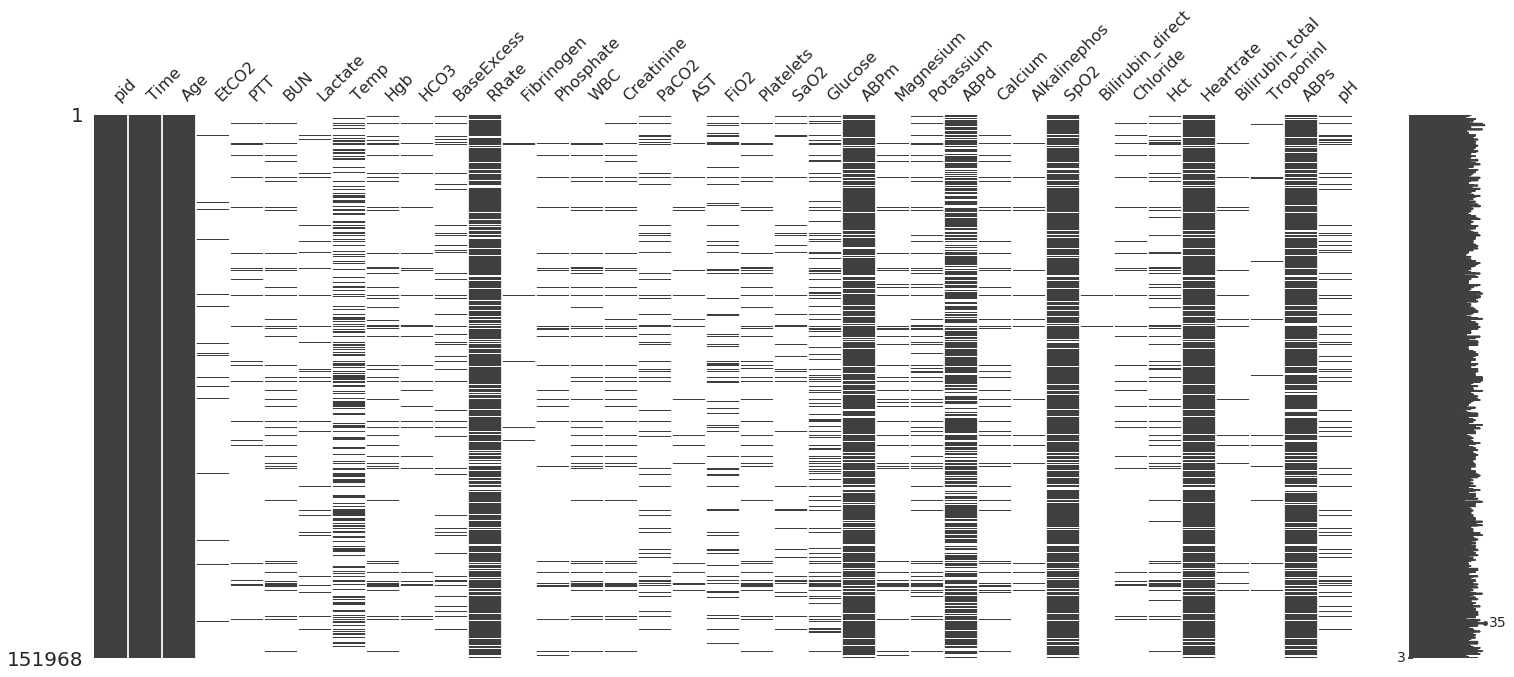

In [71]:
msno.matrix(df_test)

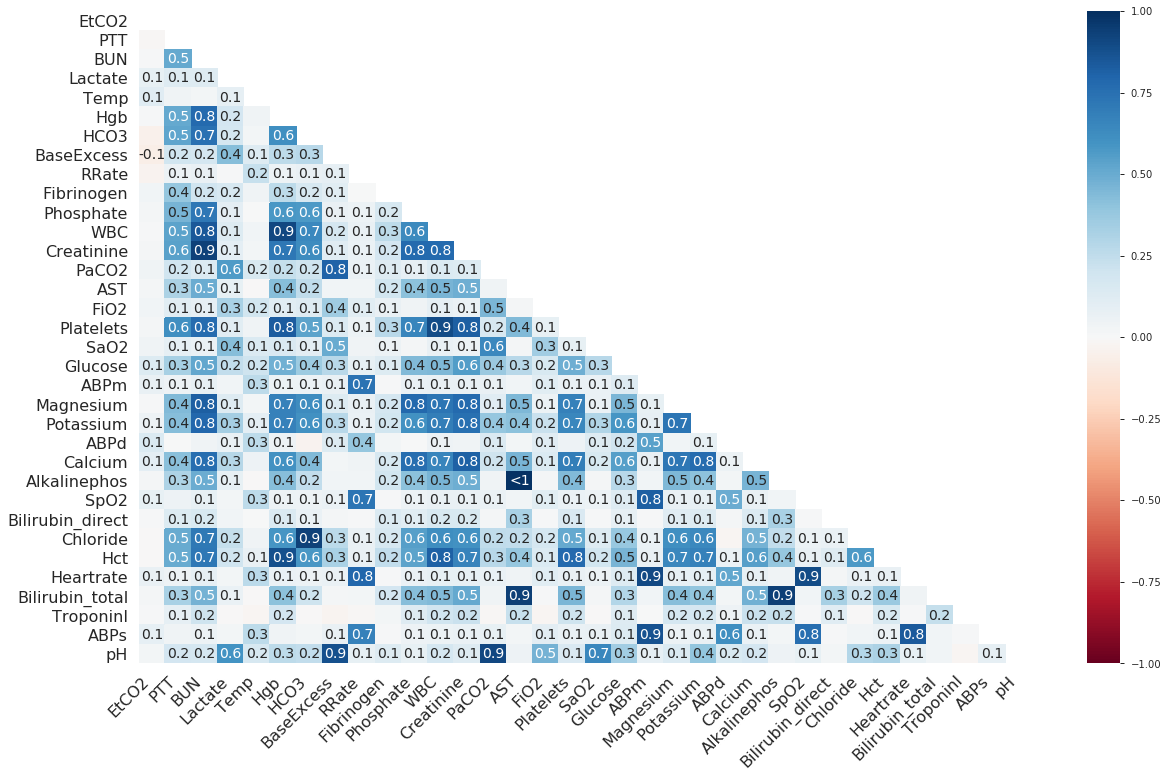

In [72]:
# The heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.
msno.heatmap(df_train)

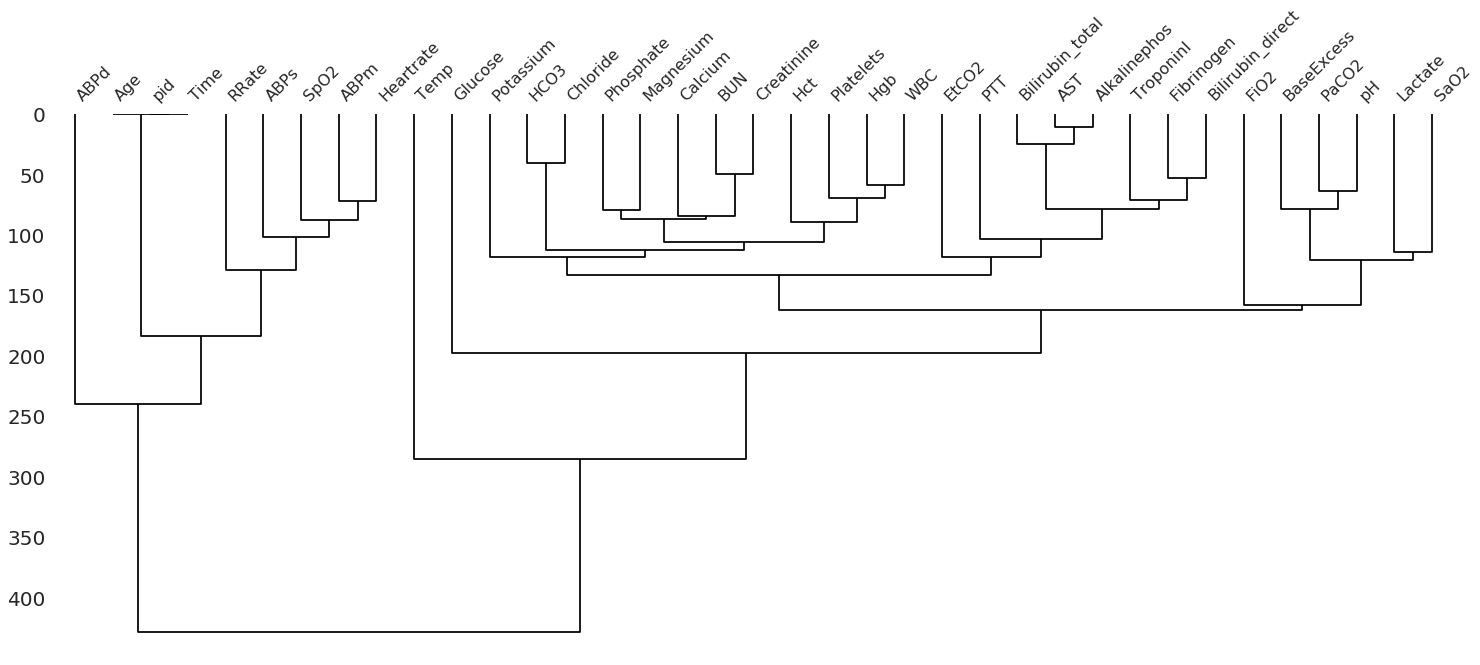

In [73]:
# Using hierarchichal clustering we can see how the nullity of a variable relates to that of another.
msno.dendrogram(df_train)

Conclusions from above plots:
* Data appears to be i.i.d.
* Some columns appear to have many more measurements than others. 
* When a column is null, other columns also tend to be null (some timepoints
seem to contain more data than others, might be useful when doing imputation)

Let's have a look at the different types and other aspects of the dataframe:


In [74]:
df_train.head(20)

,pid,Time,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,...,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH
0,1,3,34.0,NaN,NaN,12.0,NaN,36.0,8.7,24.0,...,NaN,100.0,NaN,114.0,24.6,94.0,NaN,NaN,142.0,7.33
1,1,4,34.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,100.0,NaN,NaN,NaN,99.0,NaN,NaN,125.0,7.33
2,1,5,34.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,100.0,NaN,NaN,NaN,92.0,NaN,NaN,110.0,7.37
3,1,6,34.0,NaN,NaN,NaN,NaN,37.0,NaN,NaN,...,NaN,100.0,NaN,NaN,NaN,88.0,NaN,NaN,104.0,7.37
4,1,7,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,100.0,NaN,NaN,22.4,81.0,NaN,NaN,100.0,7.41
5,1,8,34.0,NaN,NaN,NaN,NaN,37.0,NaN,NaN,...,NaN,100.0,NaN,NaN,22.4,82.0,NaN,NaN,106.0,NaN
6,1,9,34.0,NaN,NaN,NaN,NaN,37.0,NaN,NaN,...,NaN,100.0,NaN,NaN,NaN,67.0,NaN,NaN,112.0,NaN
7,1,10,34.0,NaN,NaN,NaN,NaN,37.0,NaN,NaN,...,NaN,100.0,NaN,NaN,NaN,62.0,NaN,NaN,121.0,NaN
8,1,11,34.0,NaN,NaN,12.0,NaN,NaN,8.5,26.0,...,NaN,100.0,NaN,111.0,23.8,58.0,NaN,NaN,118.0,NaN
9,1,12,34.0,NaN,NaN,12.0,NaN,38.0,8.5,26.0,...,NaN,100.0,NaN,111.0,23.8,66.0,NaN,NaN,110.0,7.39


In [75]:
df_train.dtypes

pid                   int64
Time                  int64
Age                 float64
EtCO2               float64
PTT                 float64
BUN                 float64
Lactate             float64
Temp                float64
Hgb                 float64
HCO3                float64
BaseExcess          float64
RRate               float64
Fibrinogen          float64
Phosphate           float64
WBC                 float64
Creatinine          float64
PaCO2               float64
AST                 float64
FiO2                float64
Platelets           float64
SaO2                float64
Glucose             float64
ABPm                float64
Magnesium           float64
Potassium           float64
ABPd                float64
Calcium             float64
Alkalinephos        float64
SpO2                float64
Bilirubin_direct    float64
Chloride            float64
Hct                 float64
Heartrate           float64
Bilirubin_total     float64
TroponinI           float64
ABPs                

In [76]:
df_train.describe()

,pid,Time,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,...,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH
count,227940.000000,227940.000000,227940.000000,9783.000000,10299.000000,20105.000000,10756.000000,81115.000000,22295.000000,12559.00000,...,5708.000000,195192.000000,719.000000,13917.000000,27297.000000,200128.000000,5326.000000,3776.000000,191650.000000,25046.000000
mean,15788.831219,7.014399,62.073809,32.883114,40.091310,23.192664,2.859716,36.852136,10.628208,23.48810,...,97.796163,97.663449,1.390723,106.260185,31.283090,84.522371,1.640941,7.269240,122.369877,7.367231
std,9151.896286,4.716103,16.451854,7.802065,26.034961,20.024289,2.428368,0.875152,2.074859,4.40378,...,122.773379,2.786186,2.792722,5.916082,5.770425,17.643437,3.244145,25.172442,23.273834,0.074384
min,1.000000,1.000000,15.000000,10.000000,12.500000,1.000000,0.200000,21.000000,3.300000,0.00000,...,12.000000,20.000000,0.010000,66.000000,9.400000,23.000000,0.100000,0.010000,21.000000,6.820000
25%,7879.000000,4.000000,52.000000,28.500000,27.800000,12.000000,1.400000,36.000000,9.200000,21.00000,...,53.000000,96.000000,0.100000,103.000000,27.300000,72.000000,0.500000,0.030000,105.000000,7.330000
50%,15726.000000,7.000000,64.000000,33.000000,32.200000,17.000000,2.100000,37.000000,10.500000,23.90000,...,72.000000,98.000000,0.300000,107.000000,30.900000,83.000000,0.800000,0.150000,119.000000,7.370000
75%,23725.000000,10.000000,74.000000,38.000000,40.600000,27.000000,3.400000,37.000000,12.000000,26.00000,...,104.000000,100.000000,1.210000,110.000000,35.000000,95.000000,1.400000,2.050000,137.000000,7.410000
max,31658.000000,315.000000,100.000000,100.000000,250.000000,268.000000,31.000000,42.000000,23.800000,50.00000,...,3833.000000,100.000000,21.200000,141.000000,63.400000,191.000000,46.500000,440.000000,287.000000,7.780000


In [ ]:
# Preliminary data analysis to see what we're dealing with here
profile_df_train = ProfileReport(df_train, title='Pandas Profiling Report of Training Features', html={'style':{'full_width':True}})
profile_df_train_label = ProfileReport(df_train_label, title='Pandas Profiling Report of Training Labels', html={'style':{'full_width':True}})
profile_df_test = ProfileReport(df_test, title='Pandas Profiling Report of Testing Features', html={'style':{'full_width':True}})

In [ ]:
profile_df_train.to_widgets()

In [ ]:
profile_df_train_label.to_widgets()

In [ ]:
profile_df_test.to_widgets()

## 3. Preprocessing
### Ideas for preprocessing
Resolve class imbalance:
* Use oversampling via SMOTE and ADASYN (https://medium.com/coinmonks/smote-and-adasyn-handling-imbalanced-data-set-34f5223e167)

Resolve missing data:
* Use averaging methods
* Use dynamic time warping and treat data as time series to get time series of equal lengths.
* Use EM algorithm
* Use algorithms that can deal with missing data

In [77]:
df_train.head(5)

,pid,Time,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,...,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH
0,1,3,34.0,NaN,NaN,12.0,NaN,36.0,8.7,24.0,...,NaN,100.0,NaN,114.0,24.6,94.0,NaN,NaN,142.0,7.33
1,1,4,34.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,100.0,NaN,NaN,NaN,99.0,NaN,NaN,125.0,7.33
2,1,5,34.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,100.0,NaN,NaN,NaN,92.0,NaN,NaN,110.0,7.37
3,1,6,34.0,NaN,NaN,NaN,NaN,37.0,NaN,NaN,...,NaN,100.0,NaN,NaN,NaN,88.0,NaN,NaN,104.0,7.37
4,1,7,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,100.0,NaN,NaN,22.4,81.0,NaN,NaN,100.0,7.41


In [83]:
columns = list(df_train.columns)
del columns[0]
del columns[0]

df_train_preprocessed = df_train

i=0
for column in columns:
    i = i + 1
    print(f"{i} of {len(columns)} processed.") 
    df_train_preprocessed[[column]] = df_train_preprocessed.groupby(['pid'])[column]\
    .transform(lambda x: x.fillna(x.mean()))

1 of 35 processed.
2 of 35 processed.
3 of 35 processed.
4 of 35 processed.
5 of 35 processed.
6 of 35 processed.
7 of 35 processed.
8 of 35 processed.
9 of 35 processed.
10 of 35 processed.
11 of 35 processed.
12 of 35 processed.
13 of 35 processed.
14 of 35 processed.
15 of 35 processed.
16 of 35 processed.
17 of 35 processed.
18 of 35 processed.
19 of 35 processed.
20 of 35 processed.
21 of 35 processed.
22 of 35 processed.
23 of 35 processed.
24 of 35 processed.
25 of 35 processed.
26 of 35 processed.
27 of 35 processed.
28 of 35 processed.
29 of 35 processed.
30 of 35 processed.
31 of 35 processed.
32 of 35 processed.
33 of 35 processed.
34 of 35 processed.
35 of 35 processed.


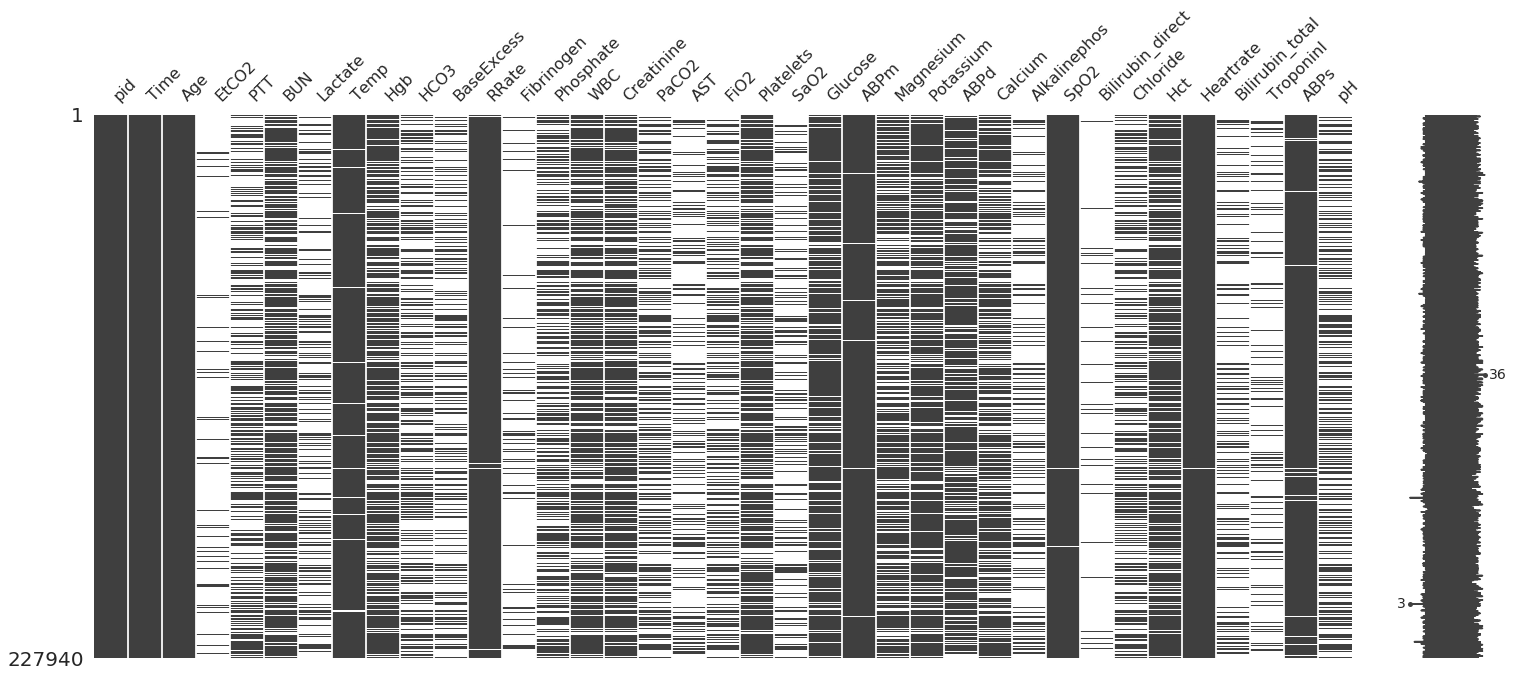

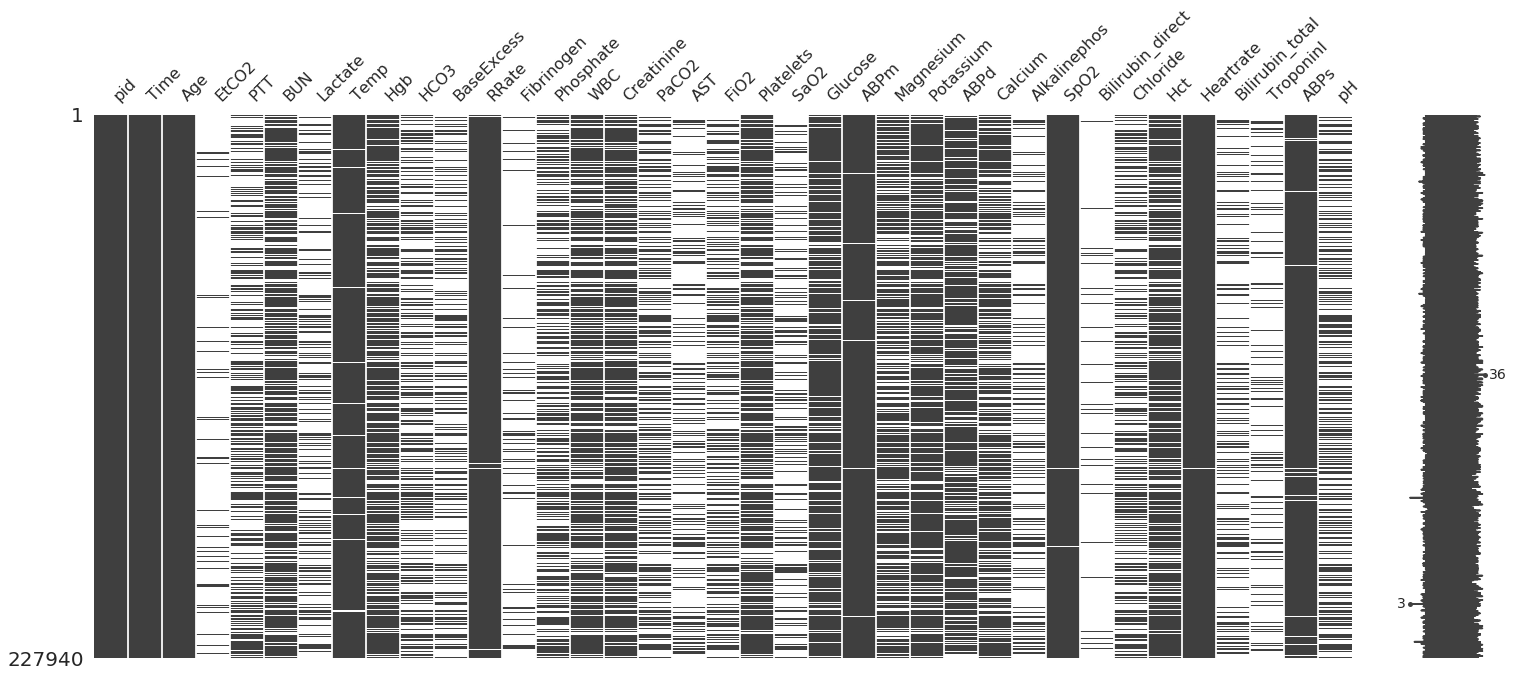

In [84]:
msno.matrix(df_train)
msno.matrix(df_train_preprocessed)

## 4. Modelling

## 5. Performance assessment

In [ ]:
# suppose df is a pandas dataframe containing the result
# df.to_csv('prediction.zip', index=False, float_format='%.3f', compression='zip')